In [1]:
import helpers
import pandas as pd
import matplotlib.pyplot as plt
from rich import print
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
connection = helpers.connect_db()
query_dict = helpers.get_queries()  

In [5]:
query_dict.keys()

dict_keys(['event_summary', 'subscription_summary', 'activity', 'net_retention_rate', 'basic_ga'])

In [5]:
df_sub_summary = pd.read_sql_query(query_dict["subscription_summary"], connection)
df_event_summary = pd.read_sql_query(query_dict["event_summary"], connection)

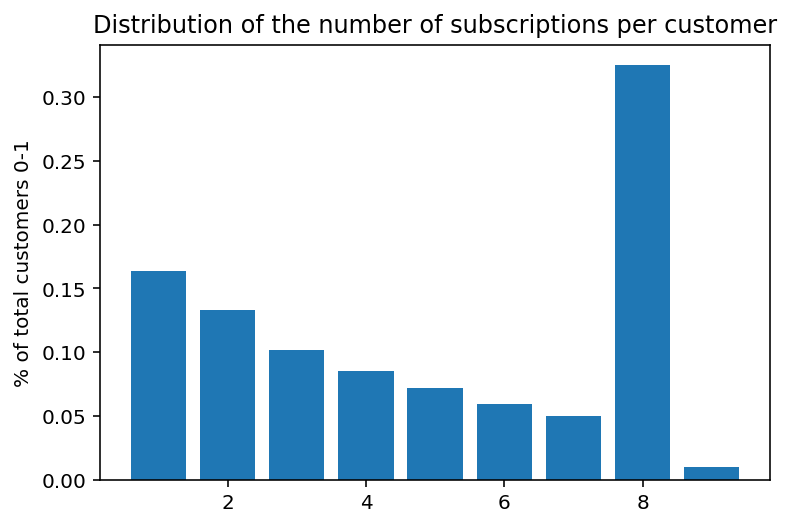

In [6]:
x = df_sub_summary.subscriptions
y = df_sub_summary.pc

plt.bar(x, y)
plt.ylabel("Number of subscriptions purchased")
plt.ylabel("% of total customers 0-1")
plt.title("Distribution of the number of subscriptions per customer")
plt.show();

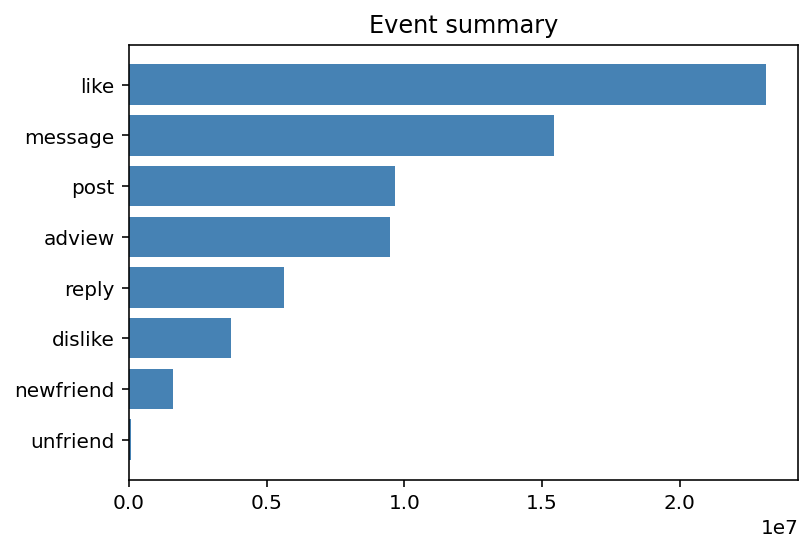

In [7]:
y1 = df_event_summary.event_count
y2 = df_event_summary.avg_time_performed_per_user
x = df_event_summary.event_type_name
events = df_event_summary.event_type_name.values

fig, ax = plt.subplots()

ax.invert_yaxis()
ax.set_title("Event summary")
ax.barh(x, y1, label="event count", color="steelblue")

# ax2 = ax.twiny()
# ax2.barh(x, y2, label="event per user", color="r")

plt.show();

In [8]:
df_nrr = pd.read_sql_query(query_dict["net_retention_rate"], connection)

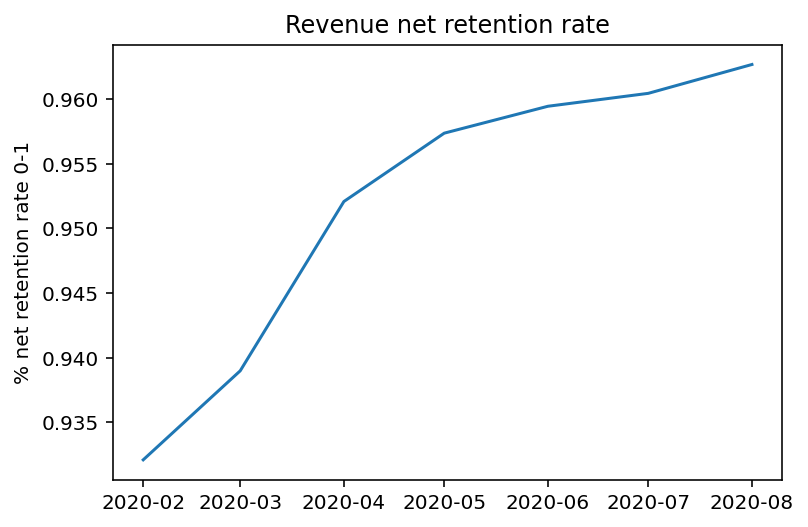

In [9]:
plt.plot(df_nrr.month_ds, df_nrr.net_mrr_retention_rate)
plt.ylabel("% net retention rate 0-1")
plt.title("Revenue net retention rate")
plt.show();

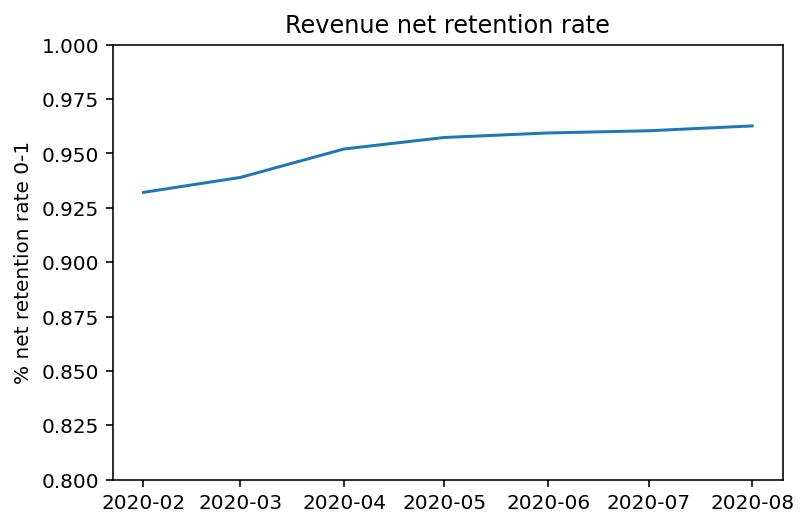

In [12]:
plt.plot(df_nrr.month_ds, df_nrr.net_mrr_retention_rate)
plt.ylabel("% net retention rate 0-1")
plt.ylim(0.8, 1)
plt.title("Revenue net retention rate")
plt.show();

Everyone is paying the same rate in the example (one value)

In [ ]:
df_simple_ga = pd.read_sql_query(query_dict["basic_ga"], connection)

In [ ]:
acquired = plt.bar(df_simple_ga.month_ds, df_simple_ga.acquired_users)
retained = plt.bar(df_simple_ga.month_ds, df_simple_ga.retained_users)
churned = plt.bar(df_simple_ga.month_ds, df_simple_ga.churned_users)

plt.title("Simple growth accounting")
plt.legend((acquired[0], retained[0], churned[0]), ('acquired', 'retained', 'churned'))
plt.show();

In [ ]:
df_cohort = pd.read_sql_query(query_dict["activity"], connection)

In [ ]:
df_cohort.cohort_month = _df_cohort.cohort_month.astype('str')
_df_cohort.set_index(['cohort_month', 'cohort_period'], inplace=True)
retention = _df_cohort.retention_pc.unstack(level=0)

In [ ]:
retention.plot(figsize=(10,5))
plt.title('User Retention')
plt.xticks(retention.index.values)
plt.ylabel('% of Cohort')